In [ ]:
import cv2
import numpy as np 
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# April 30
# img1 = cv2.imread('/content/drive/MyDrive/DREAMS-LAB/Krutarth-Multispectral test images/Apr30_1pm_IMG_0010_Band_1.tif')
# img2 = cv2.imread('/content/drive/MyDrive/DREAMS-LAB/Krutarth-Multispectral test images/Apr30_1pm_IMG_0010_Band_2.tif')
# img3 = cv2.imread('/content/drive/MyDrive/DREAMS-LAB/Krutarth-Multispectral test images/Apr30_1pm_IMG_0010_Band_3.tif')
# img4 = cv2.imread('/content/drive/MyDrive/DREAMS-LAB/Krutarth-Multispectral test images/Apr30_1pm_IMG_0010_Band_4.tif')
# img5 = cv2.imread('/content/drive/MyDrive/DREAMS-LAB/Krutarth-Multispectral test images/Apr30_1pm_IMG_0010_Band_5.tif')

# Aug 6
img1 = cv2.imread('/content/drive/MyDrive/DREAMS-LAB/Multispectral/Week2/Week2_Apr28_11AM/IMG_0000_1.tif')
img2 = cv2.imread('/content/drive/MyDrive/DREAMS-LAB/Multispectral/Week2/Week2_Apr28_11AM/IMG_0000_2.tif')
img3 = cv2.imread('/content/drive/MyDrive/DREAMS-LAB/Multispectral/Week2/Week2_Apr28_11AM/IMG_0000_3.tif')
img4 = cv2.imread('/content/drive/MyDrive/DREAMS-LAB/Multispectral/Week2/Week2_Apr28_11AM/IMG_0000_4.tif')
img5 = cv2.imread('/content/drive/MyDrive/DREAMS-LAB/Multispectral/Week2/Week2_Apr28_11AM/IMG_0000_5.tif')

# May 24 
# img1 = cv2.imread('/content/drive/MyDrive/DREAMS-LAB/Krutarth-Multispectral test images/May24_1pm_IMG_0025_Band_1.tif')
# img2 = cv2.imread('/content/drive/MyDrive/DREAMS-LAB/Krutarth-Multispectral test images/May24_1pm_IMG_0025_Band_2.tif')
# img3 = cv2.imread('/content/drive/MyDrive/DREAMS-LAB/Krutarth-Multispectral test images/May24_1pm_IMG_0025_Band_3.tif')
# img4 = cv2.imread('/content/drive/MyDrive/DREAMS-LAB/Krutarth-Multispectral test images/May24_1pm_IMG_0025_Band_4.tif')
# img5 = cv2.imread('/content/drive/MyDrive/DREAMS-LAB/Krutarth-Multispectral test images/May24_1pm_IMG_0025_Band_5.tif')

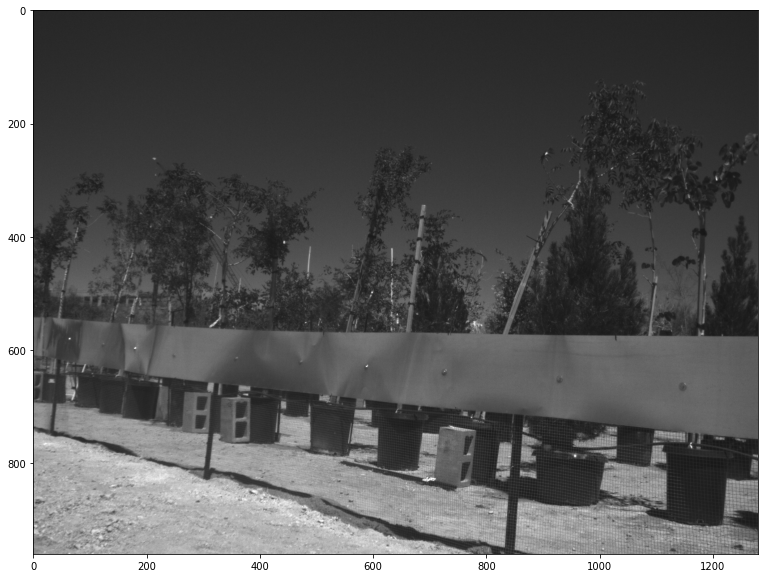

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(img3)

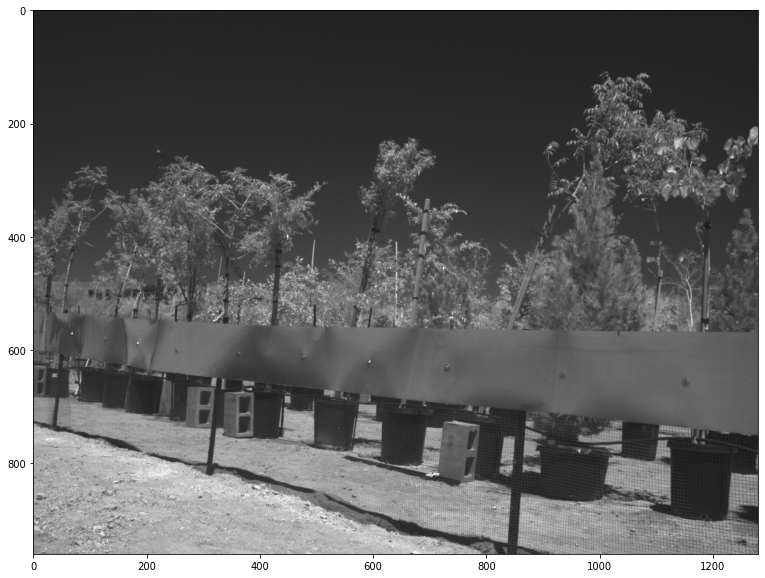

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(img5)

In [ ]:
from __future__ import print_function
import cv2
import numpy as np

MAX_FEATURES = 2000
GOOD_MATCH_PERCENT = 0.5

def alignImages(im1, im2):

  # Convert images to grayscale
  im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
  im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

  # Detect ORB features and compute descriptors.
  orb = cv2.ORB_create(MAX_FEATURES)
  keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
  keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)

  # Match features.
  matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
  matches = matcher.match(descriptors1, descriptors2, None)

  # Sort matches by score
  print(matches)
  # matches.sort(key=lambda x: x.distance, reverse=False)
  matches = sorted(matches, key = lambda x:x.distance)

  # Remove not so good matches
  numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
  matches = matches[:numGoodMatches]

  # Draw top matches
  imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
  cv2.imwrite("matches.jpg", imMatches)

  # Extract location of good matches
  points1 = np.zeros((len(matches), 2), dtype=np.float32)
  points2 = np.zeros((len(matches), 2), dtype=np.float32)

  for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

  # Find homography
  h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

  # Use homography
  height, width, channels = im2.shape
  im1Reg = cv2.warpPerspective(im1, h, (width, height))

  return im1Reg, h

if __name__ == '__main__':

  # Read reference image
  # refFilename = "form.jpg"
  # print("Reading reference image : ", refFilename)
  # imReference = cv2.imread(refFilename, cv2.IMREAD_COLOR)

  # # Read image to be aligned
  # imFilename = "scanned-form.jpg"
  # print("Reading image to align : ", imFilename);
  # im = cv2.imread(imFilename, cv2.IMREAD_COLOR)

  print("Aligning images ...")
  # Registered image will be resotred in imReg.
  # The estimated homography will be stored in h.
  imReg, h = alignImages(img3, img5)

  # Write aligned image to disk.
  outFilename = "aligned.jpg"
  print("Saving aligned image : ", outFilename);
  cv2.imwrite(outFilename, imReg)

  # Print estimated homography
  print("Estimated homography : \n",  h)

Aligning images ...
(< cv2.DMatch 0x7f82a86ddef0>, < cv2.DMatch 0x7f82a86dd610>, < cv2.DMatch 0x7f82a86dd790>, < cv2.DMatch 0x7f82a86dd650>, < cv2.DMatch 0x7f82a86dd850>, < cv2.DMatch 0x7f82a86dd070>, < cv2.DMatch 0x7f82a86de630>, < cv2.DMatch 0x7f82a8756db0>, < cv2.DMatch 0x7f82a8756fb0>, < cv2.DMatch 0x7f82a8756950>, < cv2.DMatch 0x7f82a8756070>, < cv2.DMatch 0x7f82a87560d0>, < cv2.DMatch 0x7f82a8756750>, < cv2.DMatch 0x7f82a8756f10>, < cv2.DMatch 0x7f82a87566d0>, < cv2.DMatch 0x7f82a8756730>, < cv2.DMatch 0x7f82a8756530>, < cv2.DMatch 0x7f82a86db1d0>, < cv2.DMatch 0x7f82a86db6d0>, < cv2.DMatch 0x7f82a86dba10>, < cv2.DMatch 0x7f82a86dbd10>, < cv2.DMatch 0x7f82a86db290>, < cv2.DMatch 0x7f82a86dbc70>, < cv2.DMatch 0x7f82a86db870>, < cv2.DMatch 0x7f82a86db370>, < cv2.DMatch 0x7f82a86db8f0>, < cv2.DMatch 0x7f82a86db770>, < cv2.DMatch 0x7f82a86db790>, < cv2.DMatch 0x7f82a86db9d0>, < cv2.DMatch 0x7f82a86dbc90>, < cv2.DMatch 0x7f82a86db070>, < cv2.DMatch 0x7f82a86dbab0>, < cv2.DMatch 0x7f82

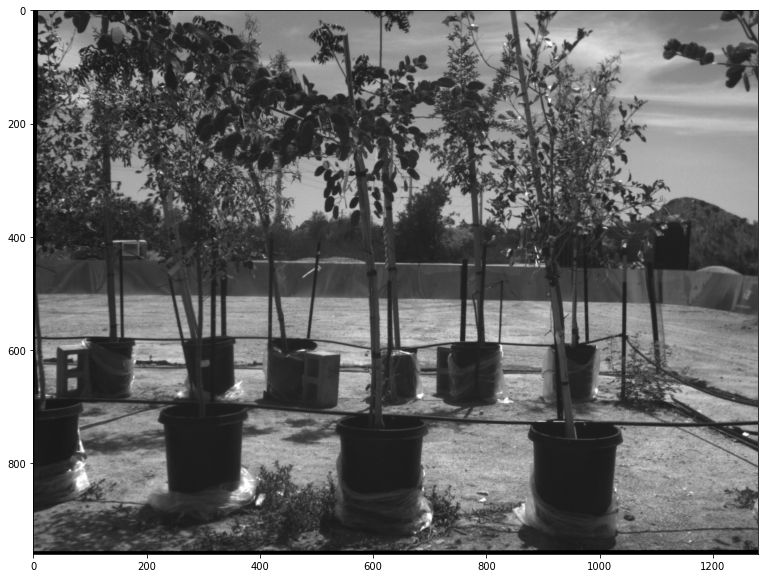

In [ ]:
img_aligned = cv2.imread("aligned.jpg")

plt.figure(figsize=(20,10))
plt.imshow(img_aligned)

In [ ]:
img_aligned.shape

(960, 1280, 3)

In [ ]:
RED = np.array(img_aligned[:,:,0], dtype = np.float64)

In [ ]:
NIR = np.array(img5[:,:,0], dtype = np.float64)
NIR

array([[ 99.,  99.,  97., ...,  92.,  86.,  84.],
       [ 99., 103., 101., ..., 101.,  87.,  86.],
       [ 98., 100.,  94., ...,  99.,  90.,  85.],
       ...,
       [105., 100.,  94., ..., 121., 121., 103.],
       [ 99., 100.,  90., ..., 112., 125., 107.],
       [106., 106.,  97., ...,  98., 113., 110.]])

In [ ]:
NDVI = (NIR-RED)/(NIR+RED)

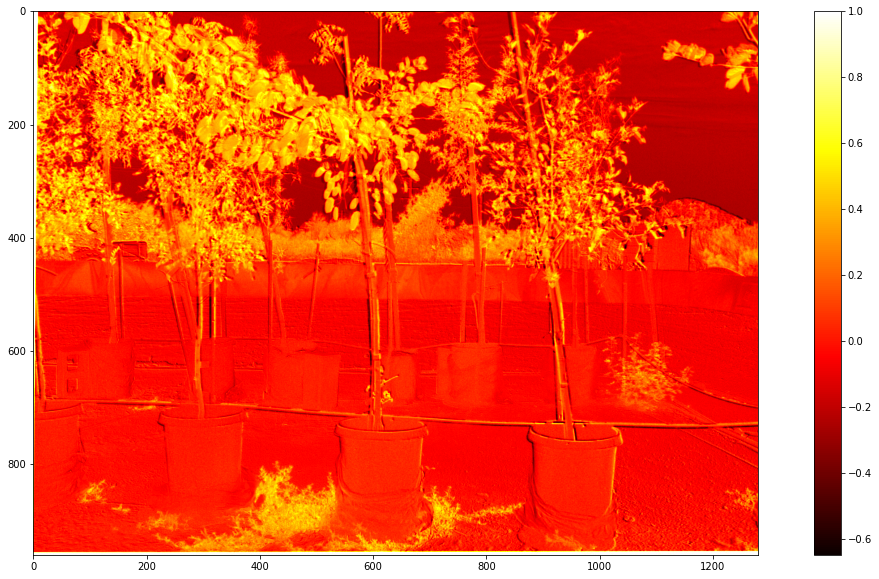

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(NDVI, cmap='hot')
plt.colorbar()

(array([1.1000e+01, 8.0000e+00, 1.1000e+01, 1.2000e+01, 8.0000e+00,
        9.0000e+00, 3.2000e+01, 6.7000e+01, 1.2400e+02, 1.8200e+02,
        2.7400e+02, 3.5800e+02, 4.1500e+02, 4.7000e+02, 4.9300e+02,
        5.7600e+02, 6.3400e+02, 6.6600e+02, 7.2100e+02, 8.5600e+02,
        9.3700e+02, 1.0730e+03, 1.1440e+03, 1.3880e+03, 1.6460e+03,
        1.7100e+03, 2.0220e+03, 2.2970e+03, 2.7210e+03, 3.1300e+03,
        3.9850e+03, 6.2120e+03, 1.0194e+04, 1.6443e+04, 2.3306e+04,
        2.5950e+04, 2.1454e+04, 1.8400e+04, 2.1428e+04, 2.7944e+04,
        3.6653e+04, 4.8228e+04, 6.2967e+04, 8.0779e+04, 6.8400e+04,
        6.2920e+04, 5.1850e+04, 3.7092e+04, 3.0468e+04, 2.5400e+04,
        2.3643e+04, 2.3608e+04, 2.4377e+04, 2.6766e+04, 2.7244e+04,
        3.2005e+04, 3.1778e+04, 3.1349e+04, 3.0140e+04, 2.9910e+04,
        2.7831e+04, 2.5824e+04, 2.6632e+04, 2.4124e+04, 2.1476e+04,
        1.9833e+04, 1.7680e+04, 1.5343e+04, 1.3311e+04, 1.1008e+04,
        9.2740e+03, 7.4460e+03, 5.2430e+03, 3.99

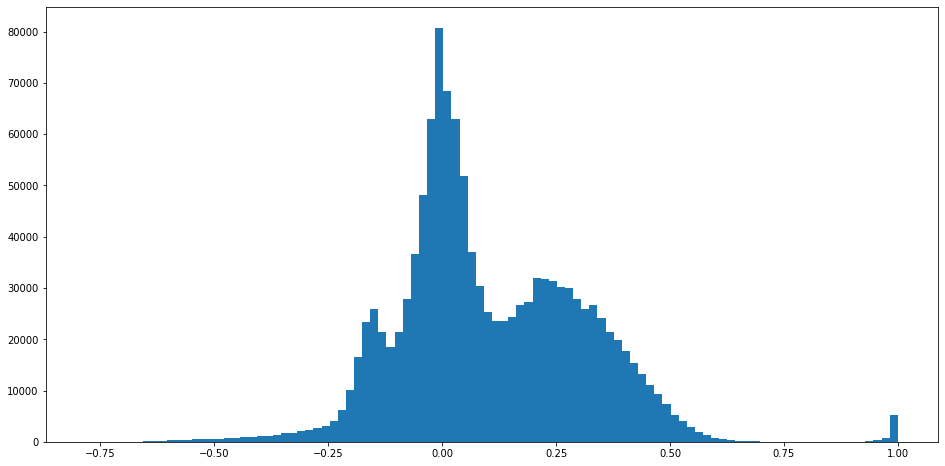

In [ ]:
plt.figure(figsize=(16,8))
plt.hist(NDVI.reshape(960*1280), bins=100)

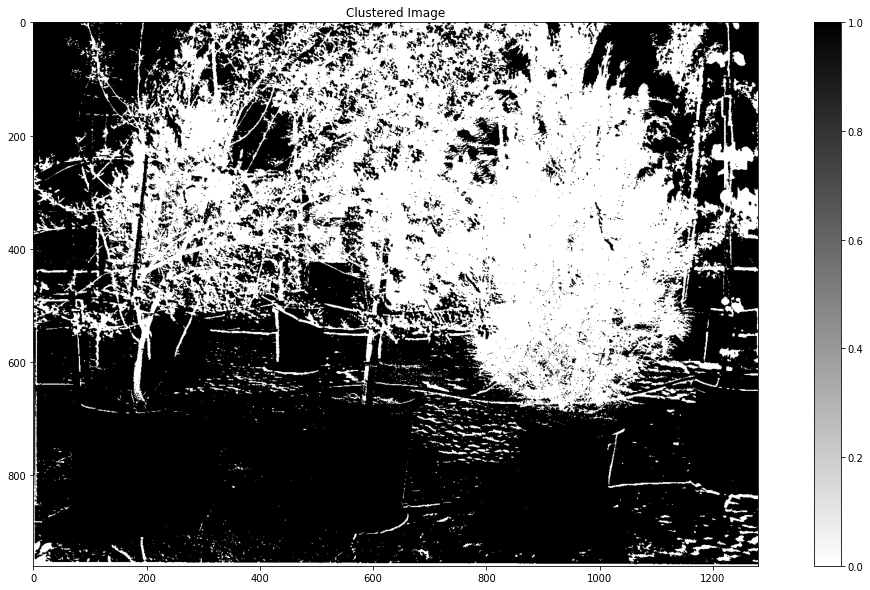

In [ ]:
img = NDVI
image_2D = img.reshape(img.shape[0]*img.shape[1], 1)
# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image

from sklearn.cluster import KMeans
# tweak the cluster size and see what happens to the Output
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2D)
clustered = kmeans.cluster_centers_[kmeans.labels_]

# Reshape back the image from 2D to 3D image
# clustered_3D = clustered.reshape(img.shape[0], img.shape[1])
clustered_3D = kmeans.labels_.reshape(img.shape[0], img.shape[1])
# clustered_3D = (clustered_3D-1) * -1

plt.figure(figsize=(20,10))
plt.imshow(clustered_3D, cmap='binary')
plt.title('Clustered Image')
plt.colorbar()
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[ 0.31019668],
       [-0.02774661]])

In [ ]:
clustered_3D = (clustered_3D-1) * -1

# clustered_3d = [i-2 if i==2 else i for i in clustered_3D]

In [ ]:
mask = clustered_3D.reshape(clustered_3D.shape[0] * clustered_3D.shape[1])
# mask = [i-2 if i==2 else i for i in mask]
NDVI_flat = NDVI.reshape(NDVI.shape[0] * NDVI.shape[1])

masked_NDVI = mask*NDVI_flat

# for i in masked_NDVI:
#   print(i.shape)

green_region = [i for i in masked_NDVI if i!=0]

(array([72131., 71167., 67017., 47023., 21535.,  7265.,  1326.,   190.,
          182., 10753.]),
 array([0.15879828, 0.24291845, 0.32703863, 0.4111588 , 0.49527897,
        0.57939914, 0.66351931, 0.74763948, 0.83175966, 0.91587983,
        1.        ]),
 <a list of 10 Patch objects>)

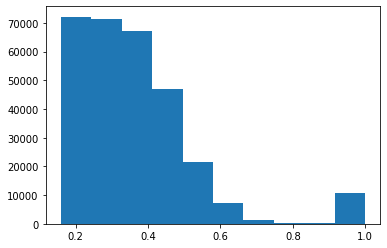

In [ ]:
plt.hist(green_region)

In [ ]:
overall_mean = []

for i in range(2000):
  overall_mean.append(np.random.choice(green_region, size=2000).mean())

# overall_mean = overall_mean/2000 
# print(overall_mean) 

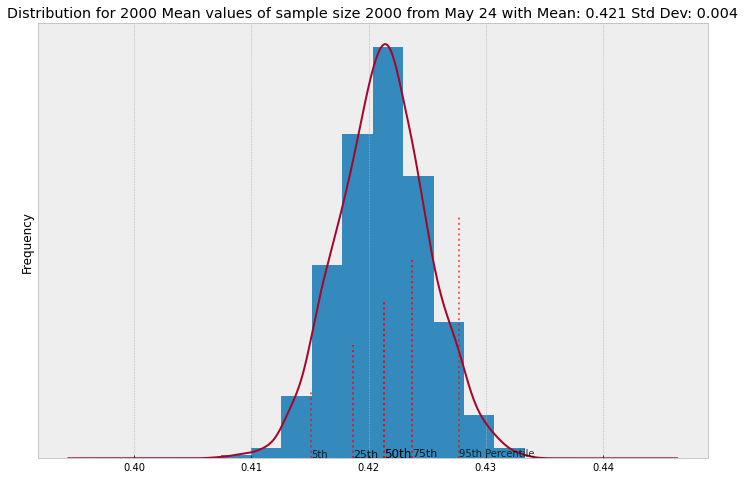

In [ ]:
mean_dist = pd.DataFrame({"values":overall_mean})
mean_dist = mean_dist["values"]
fig, ax = plt.subplots(figsize = (12,8))
mean_dist.plot(kind = "hist", density = True)
mean_dist.plot(kind = "kde")


# # Overall #
ax.set_title("Distribution for 2000 Mean values of sample size 2000 from May 24 with Mean: "+ str(round(mean_dist.mean(), 3)) + " Std Dev: " + str(round(mean_dist.std(), 3)))

ax.set_yticks([])
    # Relabel the axis as "Frequency"
ax.set_ylabel("Frequency")

quant_5, quant_25, quant_50, quant_75, quant_95 = mean_dist.quantile(0.05), mean_dist.quantile(0.25), mean_dist.quantile(0.5), mean_dist.quantile(0.75), mean_dist.quantile(0.95)
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]

# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":", color = 'red')
    # ax.text(quant_5-.1, 0.17, "5th", size = 10, alpha = 0.8)

ax.text(quant_5,  0.17, "5th", size = 10, alpha = 0.8)
ax.text(quant_25, 0.27, "25th", size = 11, alpha = 0.85)
ax.text(quant_50, 0.37, "50th", size = 12, alpha = 1)
ax.text(quant_75, 0.47, "75th", size = 11, alpha = 0.85)
ax.text(quant_95, 0.57, "95th Percentile", size = 10, alpha =.8)

plt.show()


In [ ]:
AUG_DIST = overall_mean

In [ ]:
MAY_DIST = overall_mean

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Density'),
 Text(0.5, 0, 'Mean NDVI vales of green region with sample size 2000')]

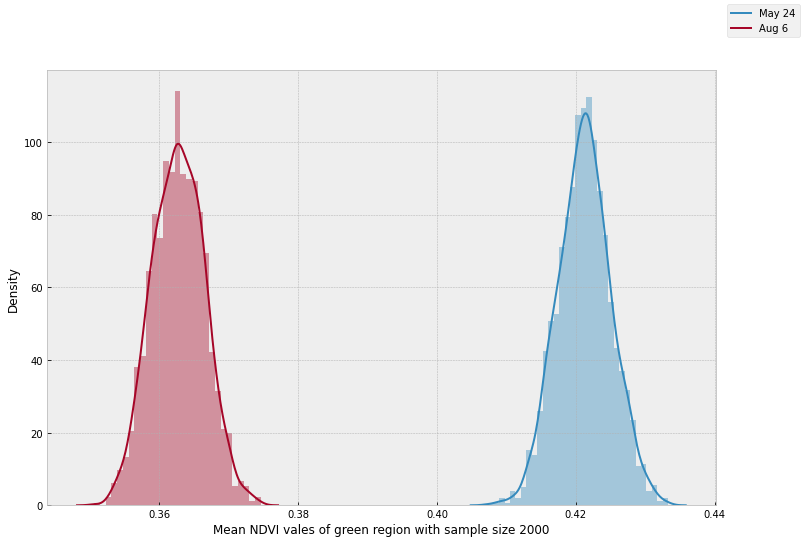

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns

fig = plt.figure(figsize=(12, 8))

data_dic = {"May 24":MAY_DIST, "Aug 6":AUG_DIST}
combined_data = pd.DataFrame(data_dic)

ax = sns.distplot(combined_data["May 24"])
ax = sns.distplot(combined_data["Aug 6"])
fig.legend(labels=["May 24","Aug 6"])
ax.set(xlabel='Mean NDVI vales of green region with sample size 2000', ylabel='Density')
# sns.displot(data=iris, x=['May 24', 'Aug 6'], hue='target', kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)

In [ ]:
MAY = 0.42164637012414113
AUG = 0.36295393676657595

In [ ]:
NDVI1 = np.logical_and(0.33 < NDVI, NDVI <= 1) 
NDVI1 = np.logical_not(NDVI1)  

In [ ]:
NDVI1 = np.array(NDVI1, dtype = np.float32)
# NDVI1

(array([ 198457.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1030343.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

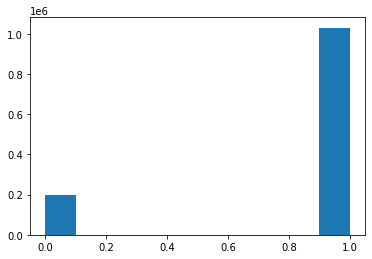

In [ ]:
plt.hist(NDVI1.reshape(960*1280))

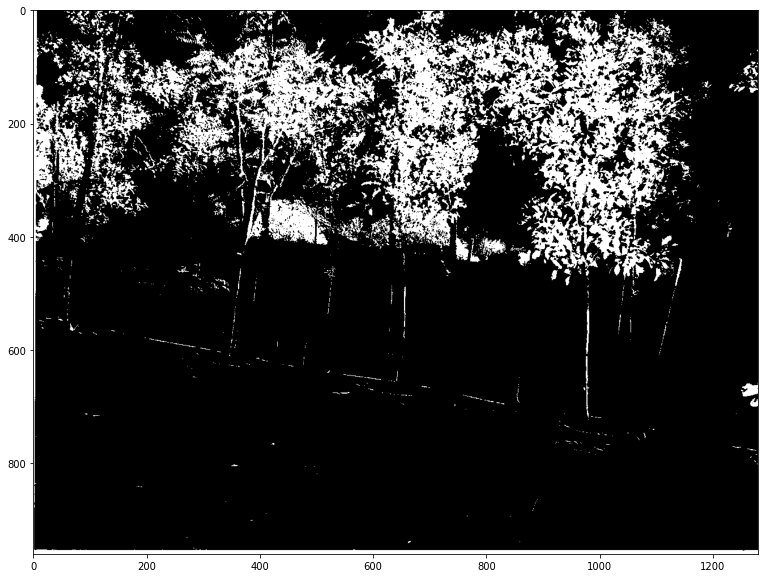

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(NDVI1, cmap='binary')
# plt.colorbar()

In [ ]:
# NDVI1 = cv2.convertScaleAbs(NDVI1)
# NDVI1.dtype

In [ ]:
kernel = np.ones((5, 5), 'uint8')
img_erosion_NDVI = cv2.erode(NDVI1, kernel, iterations=2)

In [ ]:
# img_erosion_NDVI = np.logical_not(img_erosion_NDVI) 
# img_erosion_NDVI = (img_erosion_NDVI - 1) * -1 
img_erosion_NDVI = np.array(img_erosion_NDVI, dtype = np.float32)
img_erosion_NDVI = cv2.convertScaleAbs(img_erosion_NDVI)

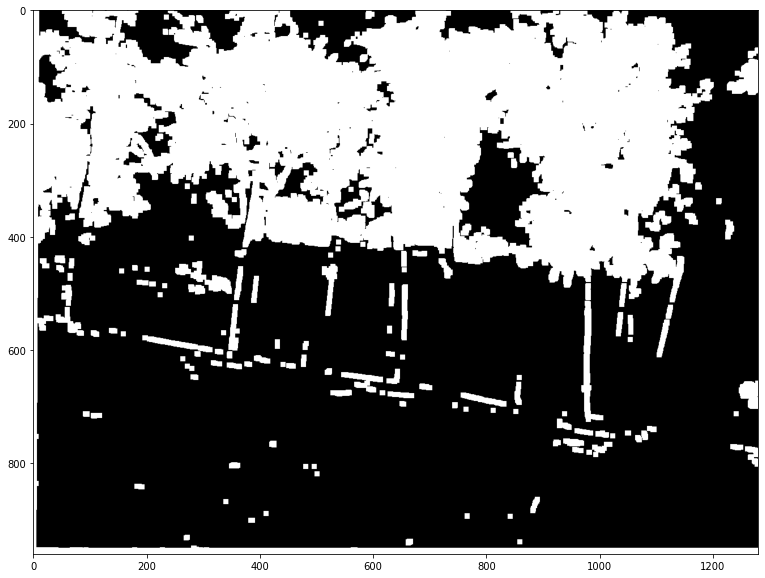

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(img_erosion_NDVI, cmap='binary')

In [ ]:
contours, hierarchy = cv2.findContours(image=img_erosion_NDVI, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

In [ ]:
image_copy = rgb_img.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(255, 0, 0), thickness=2, lineType=cv2.LINE_AA)

array([[[  0,  96,   0],
        [  0,  93,   0],
        [  0,  97,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0,  93,   0],
        [  0,  98,   0],
        [  0,  94,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0,  96,   0],
        [  0,  95,   0],
        [  0,  98,   0],
        ...,
        [ 52,  88, 134],
        [255,   0,   0],
        [255,   0,   0]],

       ...,

       [[  0, 106,   0],
        [  0, 102,   0],
        [  0, 102,   0],
        ...,
        [ 31,  33,   0],
        [ 32,  33,   0],
        [ 31,  33,   0]],

       [[  0, 114,   0],
        [  0, 110,   0],
        [  0, 105,   0],
        ...,
        [ 21,  33,   0],
        [ 21,  32,   0],
        [ 21,  32,   0]],

       [[  0, 115,   0],
        [  0, 110,   0],
        [  0, 108,   0],
        ...,
        [  0,  29,   0],
        [  0,  30,   0],
        [  0,  30,   0]]

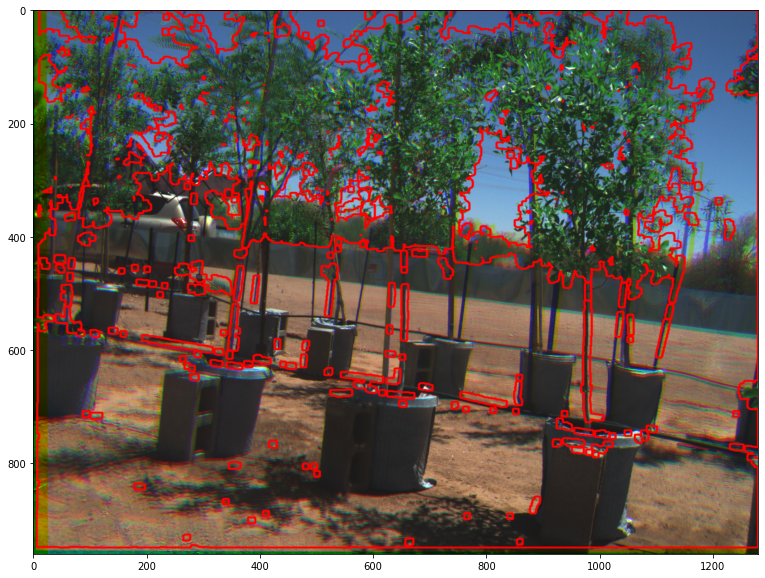

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(image_copy)

#Creating an RGB Image

In [ ]:
im_b, h = alignImages(img1, img2)

outFilename = "aligned_blue.jpg"
print("Saving aligned image : ", outFilename);
cv2.imwrite(outFilename, im_b)

(< cv2.DMatch 0x7f68a02aa750>, < cv2.DMatch 0x7f68a02af690>, < cv2.DMatch 0x7f68a02929f0>, < cv2.DMatch 0x7f68a0292f30>, < cv2.DMatch 0x7f68a0292750>, < cv2.DMatch 0x7f68a0292670>, < cv2.DMatch 0x7f68a02929b0>, < cv2.DMatch 0x7f68a0292a70>, < cv2.DMatch 0x7f68a02920b0>, < cv2.DMatch 0x7f68a02923f0>, < cv2.DMatch 0x7f68a0292490>, < cv2.DMatch 0x7f68a0292050>, < cv2.DMatch 0x7f68a0292830>, < cv2.DMatch 0x7f68a02920d0>, < cv2.DMatch 0x7f68a23bf810>, < cv2.DMatch 0x7f68a23bf170>, < cv2.DMatch 0x7f68a0289830>, < cv2.DMatch 0x7f68a0289390>, < cv2.DMatch 0x7f68a0289db0>, < cv2.DMatch 0x7f68a02896f0>, < cv2.DMatch 0x7f68a0289d50>, < cv2.DMatch 0x7f68a0289d30>, < cv2.DMatch 0x7f68a02895b0>, < cv2.DMatch 0x7f68a0289cf0>, < cv2.DMatch 0x7f68a0291c50>, < cv2.DMatch 0x7f68a0291570>, < cv2.DMatch 0x7f68a02919d0>, < cv2.DMatch 0x7f68a02915d0>, < cv2.DMatch 0x7f68a02913d0>, < cv2.DMatch 0x7f68a0291870>, < cv2.DMatch 0x7f68a0291590>, < cv2.DMatch 0x7f68a02919f0>, < cv2.DMatch 0x7f68a0291350>, < cv2.DMa

True

In [ ]:
im_blue = cv2.imread("aligned_blue.jpg")
im_r, h = alignImages(img3, img2)

outFilename = "aligned_red.jpg"
print("Saving aligned image : ", outFilename);
cv2.imwrite(outFilename, im_r)

(< cv2.DMatch 0x7f68a02920b0>, < cv2.DMatch 0x7f68a02929b0>, < cv2.DMatch 0x7f68a0292f30>, < cv2.DMatch 0x7f68a0292490>, < cv2.DMatch 0x7f68a0292750>, < cv2.DMatch 0x7f68a02929f0>, < cv2.DMatch 0x7f68a0292050>, < cv2.DMatch 0x7f68a0292670>, < cv2.DMatch 0x7f68a02923f0>, < cv2.DMatch 0x7f68a0292830>, < cv2.DMatch 0x7f68a02919f0>, < cv2.DMatch 0x7f68a0291210>, < cv2.DMatch 0x7f68a0291a30>, < cv2.DMatch 0x7f68a0291350>, < cv2.DMatch 0x7f68a02913d0>, < cv2.DMatch 0x7f68a0291870>, < cv2.DMatch 0x7f68a0291570>, < cv2.DMatch 0x7f68a02919d0>, < cv2.DMatch 0x7f68a02915d0>, < cv2.DMatch 0x7f68a0291c50>, < cv2.DMatch 0x7f68a0291590>, < cv2.DMatch 0x7f68a0291c70>, < cv2.DMatch 0x7f68a02895b0>, < cv2.DMatch 0x7f68a02896f0>, < cv2.DMatch 0x7f68a0289db0>, < cv2.DMatch 0x7f68a0289d30>, < cv2.DMatch 0x7f68a0289d50>, < cv2.DMatch 0x7f68a0289830>, < cv2.DMatch 0x7f68a0289390>, < cv2.DMatch 0x7f68a0289cf0>, < cv2.DMatch 0x7f68a0179810>, < cv2.DMatch 0x7f68a0179c70>, < cv2.DMatch 0x7f68a0179390>, < cv2.DMa

True

In [ ]:
t = (im_r[:,:,0].reshape(960, 1280, 1), img2[:,:,0].reshape(960, 1280, 1), im_b[:,:,0].reshape(960, 1280, 1))

In [ ]:
rgb_img = np.concatenate(t, axis=-1)

In [ ]:
rgb_img.shape

(960, 1280, 3)

In [ ]:
rgb_img = np.array(rgb_img)

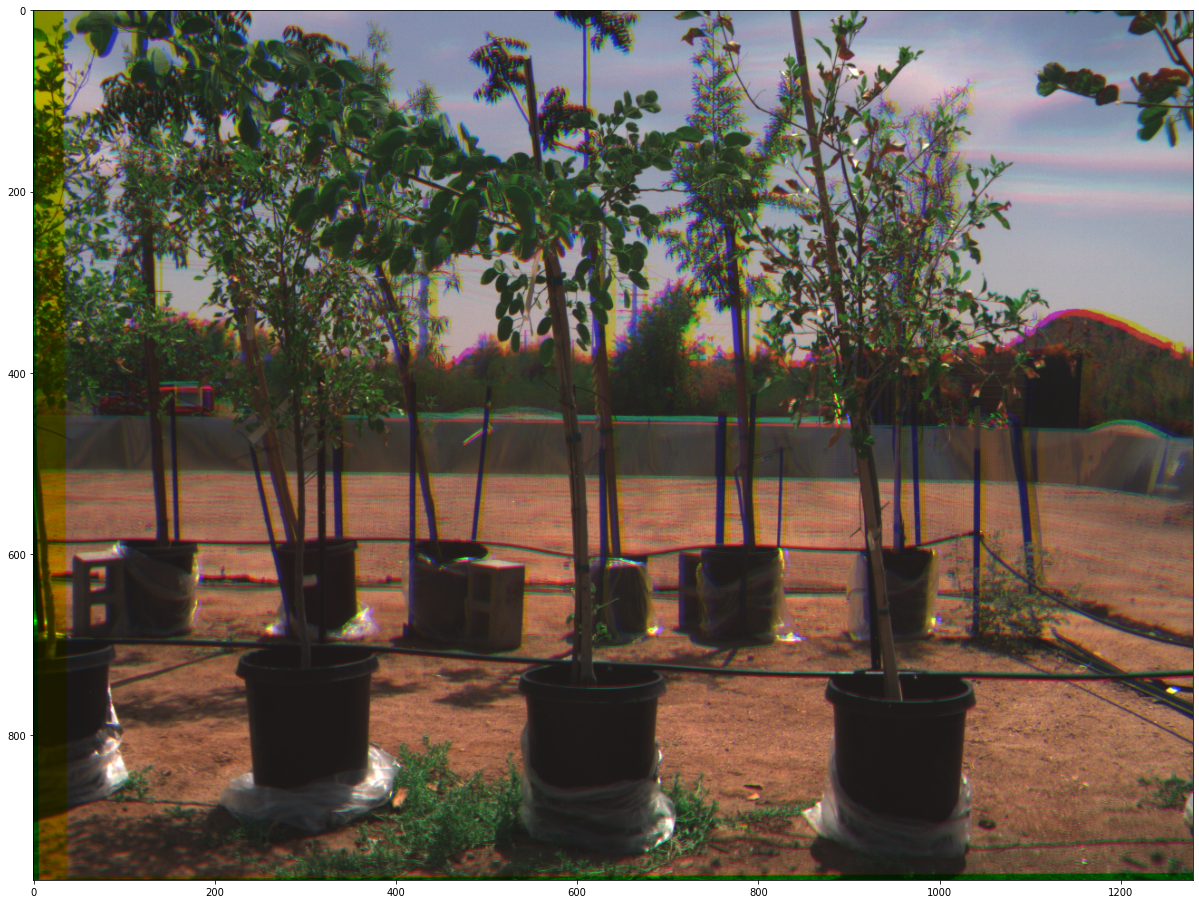

In [ ]:
plt.figure(figsize=(32,16))

plt.imshow(rgb_img)

In [ ]:
cv2.imwrite('rgb.png', rgb_img)

True

In [ ]:
plt.imsave('rgb.png', rgb_img)

In [ ]:
img1[:,:,0] - img1[:,:,1]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)